Importing all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
stock_data = pd.read_csv('/content/NFLX.csv')

In [ ]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [ ]:
stock_data.shape

(1009, 7)

Sanity Checking


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
stock_data.duplicated().sum()

0

In [ ]:
for column in stock_data.select_dtypes(include='object').columns:
    unique_values = stock_data[column].unique()
    print(f"Value counts:\n{stock_data[column].value_counts()}\n")

Value counts:
2018-02-05    1
2020-10-14    1
2020-09-25    1
2020-09-28    1
2020-09-29    1
             ..
2019-06-14    1
2019-06-17    1
2019-06-18    1
2019-06-19    1
2022-02-04    1
Name: Date, Length: 1009, dtype: int64



EDA(EXPLORATORY DATA ANALYSIS)

In [ ]:
stock_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


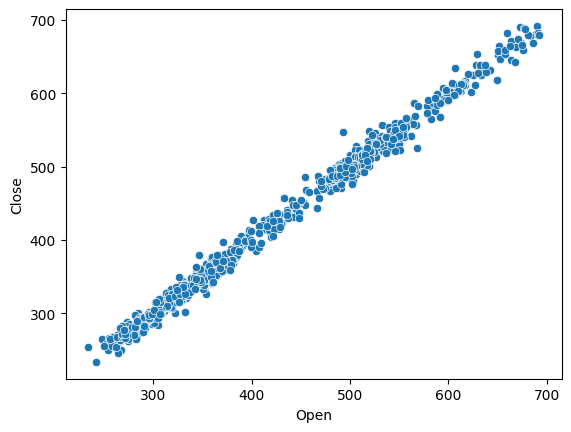

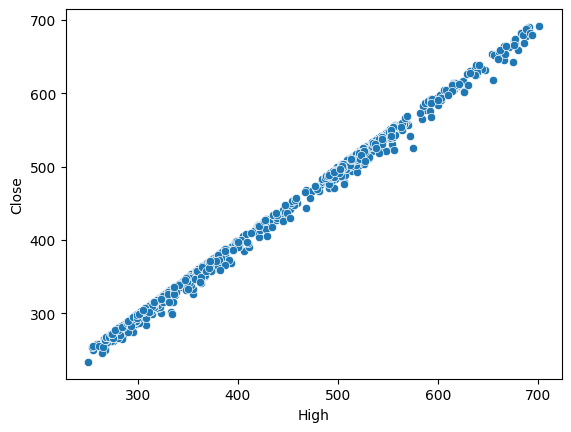

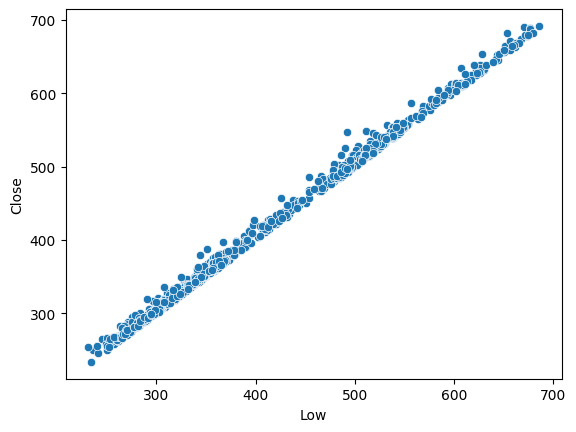

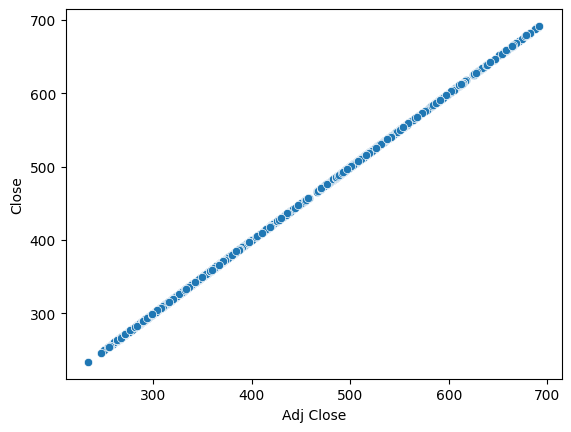

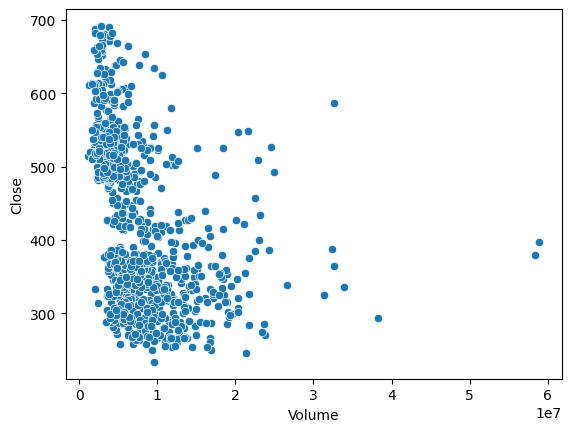

In [ ]:
#scatterplot
for i in ['Open', 'High', 'Low', 'Adj Close', 'Volume']: #removing closing price as it is the target variable
    sns.scatterplot(data=stock_data,x=i,y="Close")
    plt.show()

In [ ]:
stock_data.select_dtypes(include="number").columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

After checking as we saw we have no missing data so we don't have to find the average.


In [ ]:
stock_data = stock_data = stock_data.set_index('Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
stock_data.index

Index(['2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
       '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16',
       ...
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
       '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04'],
      dtype='object', name='Date', length=1009)

THE CLOSING PRICE ONLY BEFORE APPLYING ANY MODEL


<Axes: xlabel='Date'>

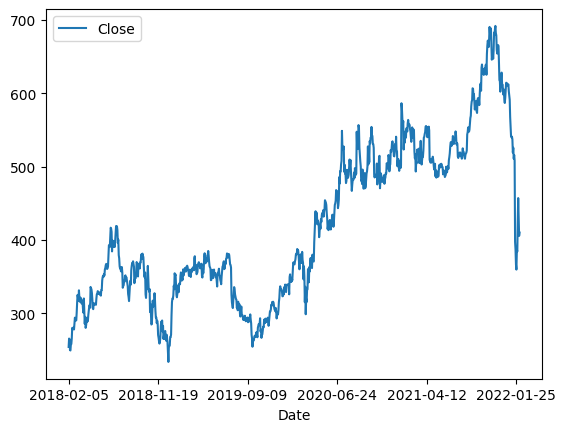

In [ ]:
print("THE CLOSING PRICE ONLY BEFORE APPLYING ANY MODEL")
stock_data.plot.line(y="Close",use_index=True)

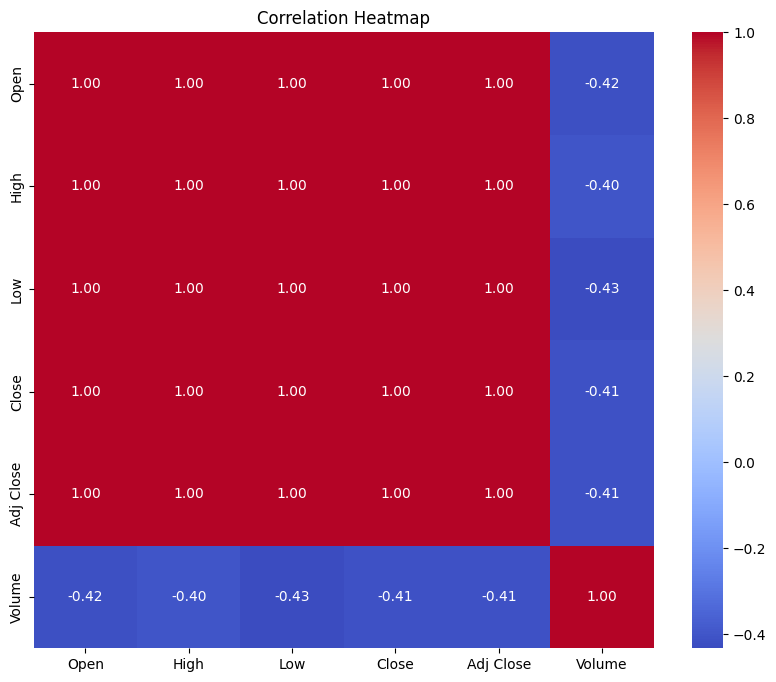

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

DATA PREPARATION WITH NECESSARY INDICATORS


In [ ]:
#in stock price prediction we generally predict the price of the current day by seeing the prev closing prices, to do so:
stock_data['Prev_day']=stock_data['Close'].shift(1)
stock_data['Prev_vol']=stock_data['Close'].shift(1)
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Prev_day,Prev_vol
Date,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,254.259995,254.259995
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,265.720001,265.720001
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,264.559998,264.559998
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,250.100006,250.100006


In [ ]:
#encoding the day-time as weekdays [ex: Sunday-0,Monday-1.....]
stock_data.index = pd.to_datetime(stock_data.index)
stock_data['Day'] = stock_data.index.dayofweek
stock_data.head(10)

,Open,High,Low,Close,Adj Close,Volume,Prev_day,Prev_vol,Day
Date,,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN,NaN,0
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,254.259995,254.259995,1
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,265.720001,265.720001,2
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,264.559998,264.559998,3
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,250.100006,250.100006,4
2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,249.470001,249.470001,0
2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,257.950012,257.950012,1
2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,258.269989,258.269989,2
2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,266.000000,266.000000,3


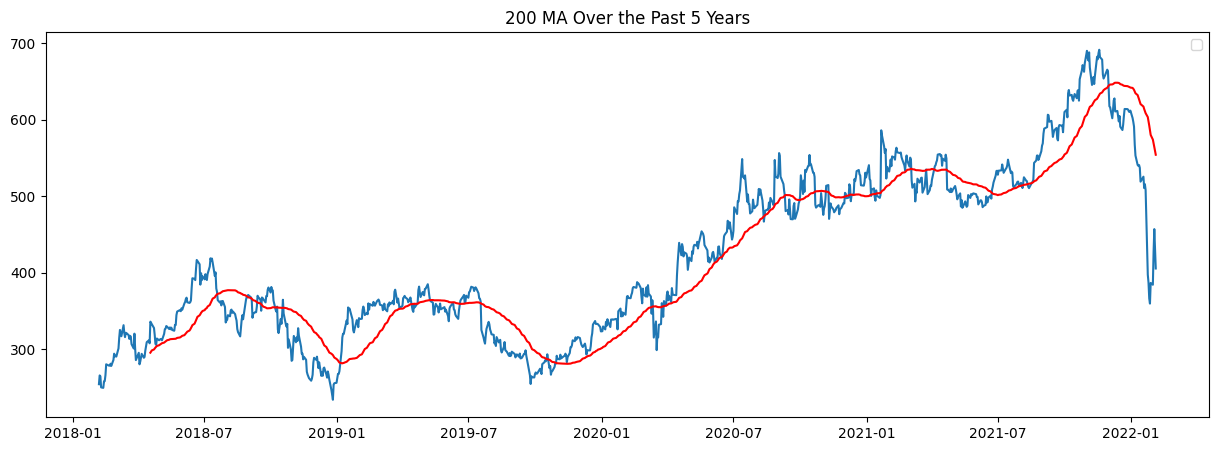

,Open,High,Low,Close,Adj Close,Volume,Prev_day,Prev_vol,Day,MA50,MA200
Date,,,,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN,NaN,0,NaN,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,254.259995,254.259995,1,NaN,NaN
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,265.720001,265.720001,2,NaN,NaN
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,264.559998,264.559998,3,NaN,NaN
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,250.100006,250.100006,4,NaN,NaN


In [ ]:
#indicator01
#creating a column to find the average price of the previous 50,200days, as it gives the moving average
stock_data['MA50']=stock_data['Prev_day'].rolling(50).mean()
stock_data['MA200']=stock_data['Prev_day'].rolling(200).mean()
date=stock_data.index.values
plt.figure(figsize=(15,5))
plt.plot(date,stock_data['Prev_day'])
plt.plot(date,stock_data['MA50'],color='red')
plt.title('200 MA Over the Past 5 Years')
plt.legend()
plt.show()
stock_data.head()

In [ ]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=21c0a3eaab40fe917b27ffd5c9e12bbb68288f2756a4648ef9258e4cdeb970d7
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
stock_data = stock_data.drop(stock_data.index[0])
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Prev_day,Prev_vol,Day,MA50,MA200
Date,,,,,,,,,,,
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,254.259995,254.259995,1,NaN,NaN
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,265.720001,265.720001,2,NaN,NaN
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,264.559998,264.559998,3,NaN,NaN
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,250.100006,250.100006,4,NaN,NaN
2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,249.470001,249.470001,0,NaN,NaN


In [ ]:
pip install pandas-ta --upgrade


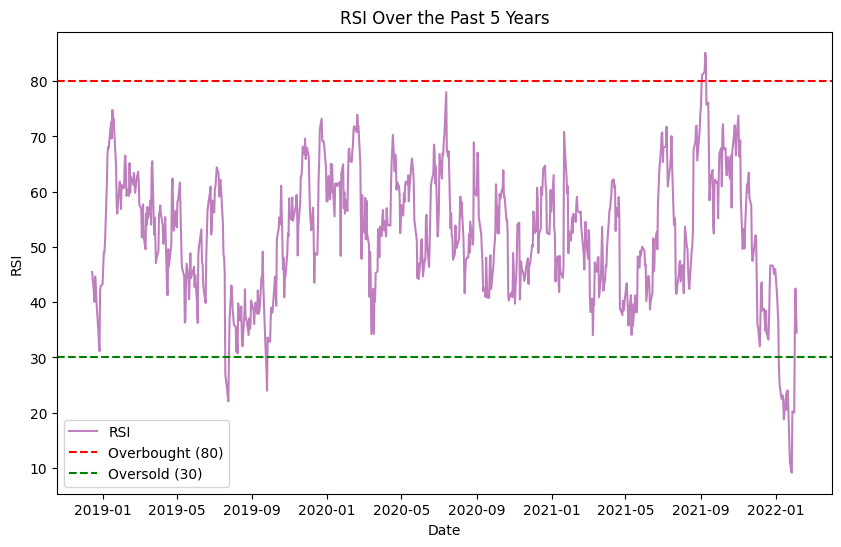

In [ ]:
import pandas_ta as ta
#indicator03
stock_data['RSI'] = ta.rsi(stock_data['Prev_day'])

stock_data['date']=stock_data.index.values
five_years_ago = pd.to_datetime('today') - pd.DateOffset(years=5)
filtered_stock_data = stock_data[stock_data['date'] >= five_years_ago]
plt.figure(figsize=(10, 6))
plt.plot(filtered_stock_data['date'], filtered_stock_data['RSI'], label='RSI', color='purple', alpha=0.5)
plt.axhline(y=80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('RSI Over the Past 5 Years')
plt.legend()
plt.show()


Indicator:4
 Bollinger Bands

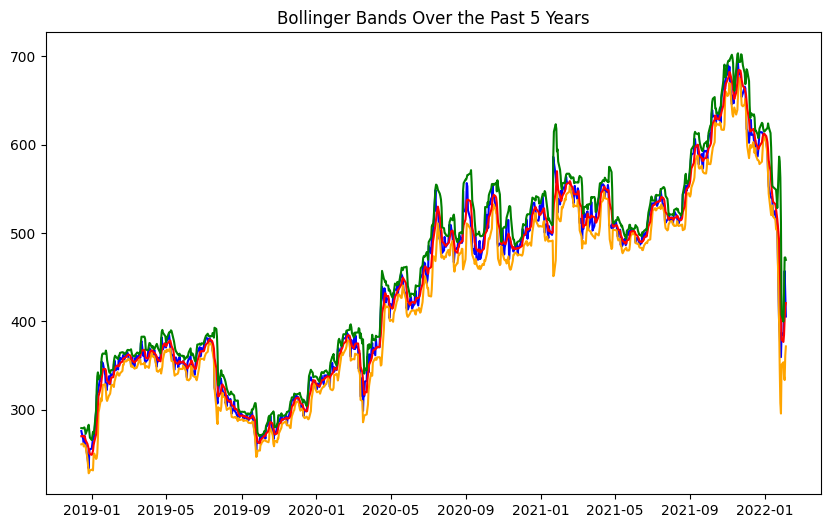

,Open,High,Low,Close,Adj Close,Volume,Prev_day,Prev_vol,Day,MA50,MA200,RSI,date,Lower_Band,Middle_Band,Upper_Band
Date,,,,,,,,,,,,,,,,
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,384.359985,384.359985,0,574.240400,560.834698,20.037503,2022-01-31,353.845700,376.866003,399.886306
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,427.140015,427.140015,1,568.949401,560.237698,34.578417,2022-02-01,337.838114,384.864007,431.889901
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,457.130005,457.130005,2,564.451600,559.751148,42.475683,2022-02-02,333.719203,403.006006,472.292809
2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,429.480011,429.480011,3,559.465201,559.150698,37.929600,2022-02-03,361.446671,416.962006,472.477341
2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400,405.600006,405.600006,4,554.393201,558.634198,34.495712,2022-02-04,371.798728,420.742004,469.685280


In [ ]:
bbands_stock_data=ta.bbands(stock_data['Prev_day'])
stock_data['Lower_Band'] = bbands_stock_data['BBL_5_2.0']
stock_data['Middle_Band'] = bbands_stock_data['BBM_5_2.0']
stock_data['Upper_Band'] = bbands_stock_data['BBU_5_2.0']
five_years_ago = pd.to_datetime('today') - pd.DateOffset(years=5)
filtered_stock_data = stock_data[stock_data['date'] >= five_years_ago]
plt.figure(figsize=(10, 6))
plt.plot(filtered_stock_data['date'], filtered_stock_data['Prev_day'], color='blue')
plt.plot(filtered_stock_data['date'], filtered_stock_data['Lower_Band'], color='orange')
plt.plot(filtered_stock_data['date'], filtered_stock_data['Middle_Band'], color='red')
plt.plot(filtered_stock_data['date'], filtered_stock_data['Upper_Band'], color='green')

plt.title('Bollinger Bands Over the Past 5 Years')
plt.show()
stock_data.tail()

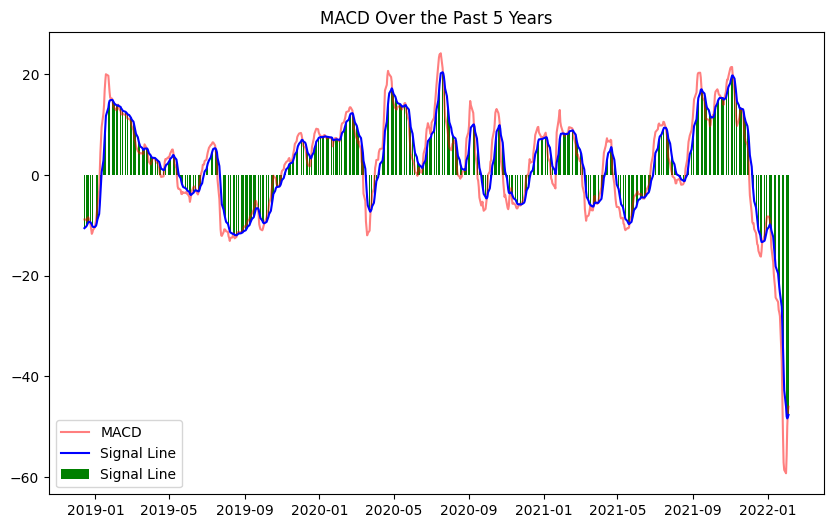

In [ ]:
def calc_macd(data, len1, len2, len3):
  shortEMA = data.ewm(span=len1, adjust=False).mean()
  longEMA = data.ewm(span=len2, adjust=False).mean()
  MACD = shortEMA - longEMA
  signal = MACD.ewm(span=len3, adjust=False).mean()
  return MACD, signal

MACD, signal = calc_macd(stock_data['Prev_day'], 12, 26, 9)
stock_data['MACD'] = MACD
stock_data['MACD_signal'] = signal
stock_data['date']=stock_data.index.values
five_years_ago = pd.to_datetime('today') - pd.DateOffset(years=5)
filtered_stock_data = stock_data[stock_data['date'] >= five_years_ago]

plt.figure(figsize=(10, 6))
plt.plot(filtered_stock_data['date'], filtered_stock_data['MACD'], label='MACD', color='red', alpha=0.5)
plt.plot(filtered_stock_data['date'], filtered_stock_data['MACD_signal'], label='Signal Line', color='blue')
plt.bar(filtered_stock_data['date'], filtered_stock_data['MACD_signal'], label='Signal Line', color='green')
plt.legend()
plt.title('MACD Over the Past 5 Years')
plt.show()

After implementing the four indicators, we will again check our dataset and get rid of the null and garbage values

In [ ]:
stock_data.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Prev_day         0
Prev_vol         0
Day              0
MA50            49
MA200          199
RSI             14
date             0
Lower_Band       4
Middle_Band      4
Upper_Band       4
MACD             0
MACD_signal      0
dtype: int64

In [ ]:
stock_data.dropna(inplace=True)
print(stock_data.isnull().sum())

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Prev_day       0
Prev_vol       0
Day            0
MA50           0
MA200          0
RSI            0
date           0
Lower_Band     0
Middle_Band    0
Upper_Band     0
MACD           0
MACD_signal    0
dtype: int64


As the stock was just lauched in the year 1980, so we can omit the first 10years data as it was primarily being traded as a penny stock and had adnormally high volumes

In [ ]:
stock_data= stock_data[stock_data.index >= '2010-01-01']
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Prev_day,Prev_vol,Day,MA50,MA200,RSI,date,Lower_Band,Middle_Band,Upper_Band,MACD,MACD_signal
Date,,,,,,,,,,,,,,,,,,
2018-11-19,283.790009,285.089996,269.149994,270.600006,270.600006,12993800,286.209991,286.209991,0,337.1728,336.16715,38.350838,2018-11-19,283.333924,290.294000,297.254076,-12.704747,-11.784998
2018-11-20,254.630005,276.339996,250.000000,266.980011,266.980011,16693800,270.600006,270.600006,1,335.6166,336.24885,33.862419,2018-11-20,269.500800,285.600000,301.699200,-14.122204,-12.252439
2018-11-21,274.420013,275.339996,261.510010,262.130005,262.130005,11023000,266.980011,266.980011,2,333.8376,336.25515,32.900774,2018-11-21,261.293181,280.116003,298.938826,-15.360584,-12.874068
2018-11-23,260.109985,265.500000,256.839996,258.820007,258.820007,5245100,262.130005,262.130005,4,331.6812,336.24300,31.605738,2018-11-23,253.258048,275.196002,297.133956,-16.542671,-13.607789
2018-11-26,260.549988,266.250000,253.800003,261.429993,261.429993,12498600,258.820007,258.820007,0,329.4946,336.28660,30.717098,2018-11-26,249.897760,268.948004,287.998248,-17.544333,-14.395097


In [ ]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Prev_day,Prev_vol,Day,MA50,MA200,RSI,date,Lower_Band,Middle_Band,Upper_Band,MACD,MACD_signal
Date,,,,,,,,,,,,,,,,,,
2018-11-19,283.790009,285.089996,269.149994,270.600006,270.600006,12993800,286.209991,286.209991,0,337.1728,336.16715,38.350838,2018-11-19,283.333924,290.294000,297.254076,-12.704747,-11.784998
2018-11-20,254.630005,276.339996,250.000000,266.980011,266.980011,16693800,270.600006,270.600006,1,335.6166,336.24885,33.862419,2018-11-20,269.500800,285.600000,301.699200,-14.122204,-12.252439
2018-11-21,274.420013,275.339996,261.510010,262.130005,262.130005,11023000,266.980011,266.980011,2,333.8376,336.25515,32.900774,2018-11-21,261.293181,280.116003,298.938826,-15.360584,-12.874068
2018-11-23,260.109985,265.500000,256.839996,258.820007,258.820007,5245100,262.130005,262.130005,4,331.6812,336.24300,31.605738,2018-11-23,253.258048,275.196002,297.133956,-16.542671,-13.607789
2018-11-26,260.549988,266.250000,253.800003,261.429993,261.429993,12498600,258.820007,258.820007,0,329.4946,336.28660,30.717098,2018-11-26,249.897760,268.948004,287.998248,-17.544333,-14.395097


<ipython-input-29-635726931781>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


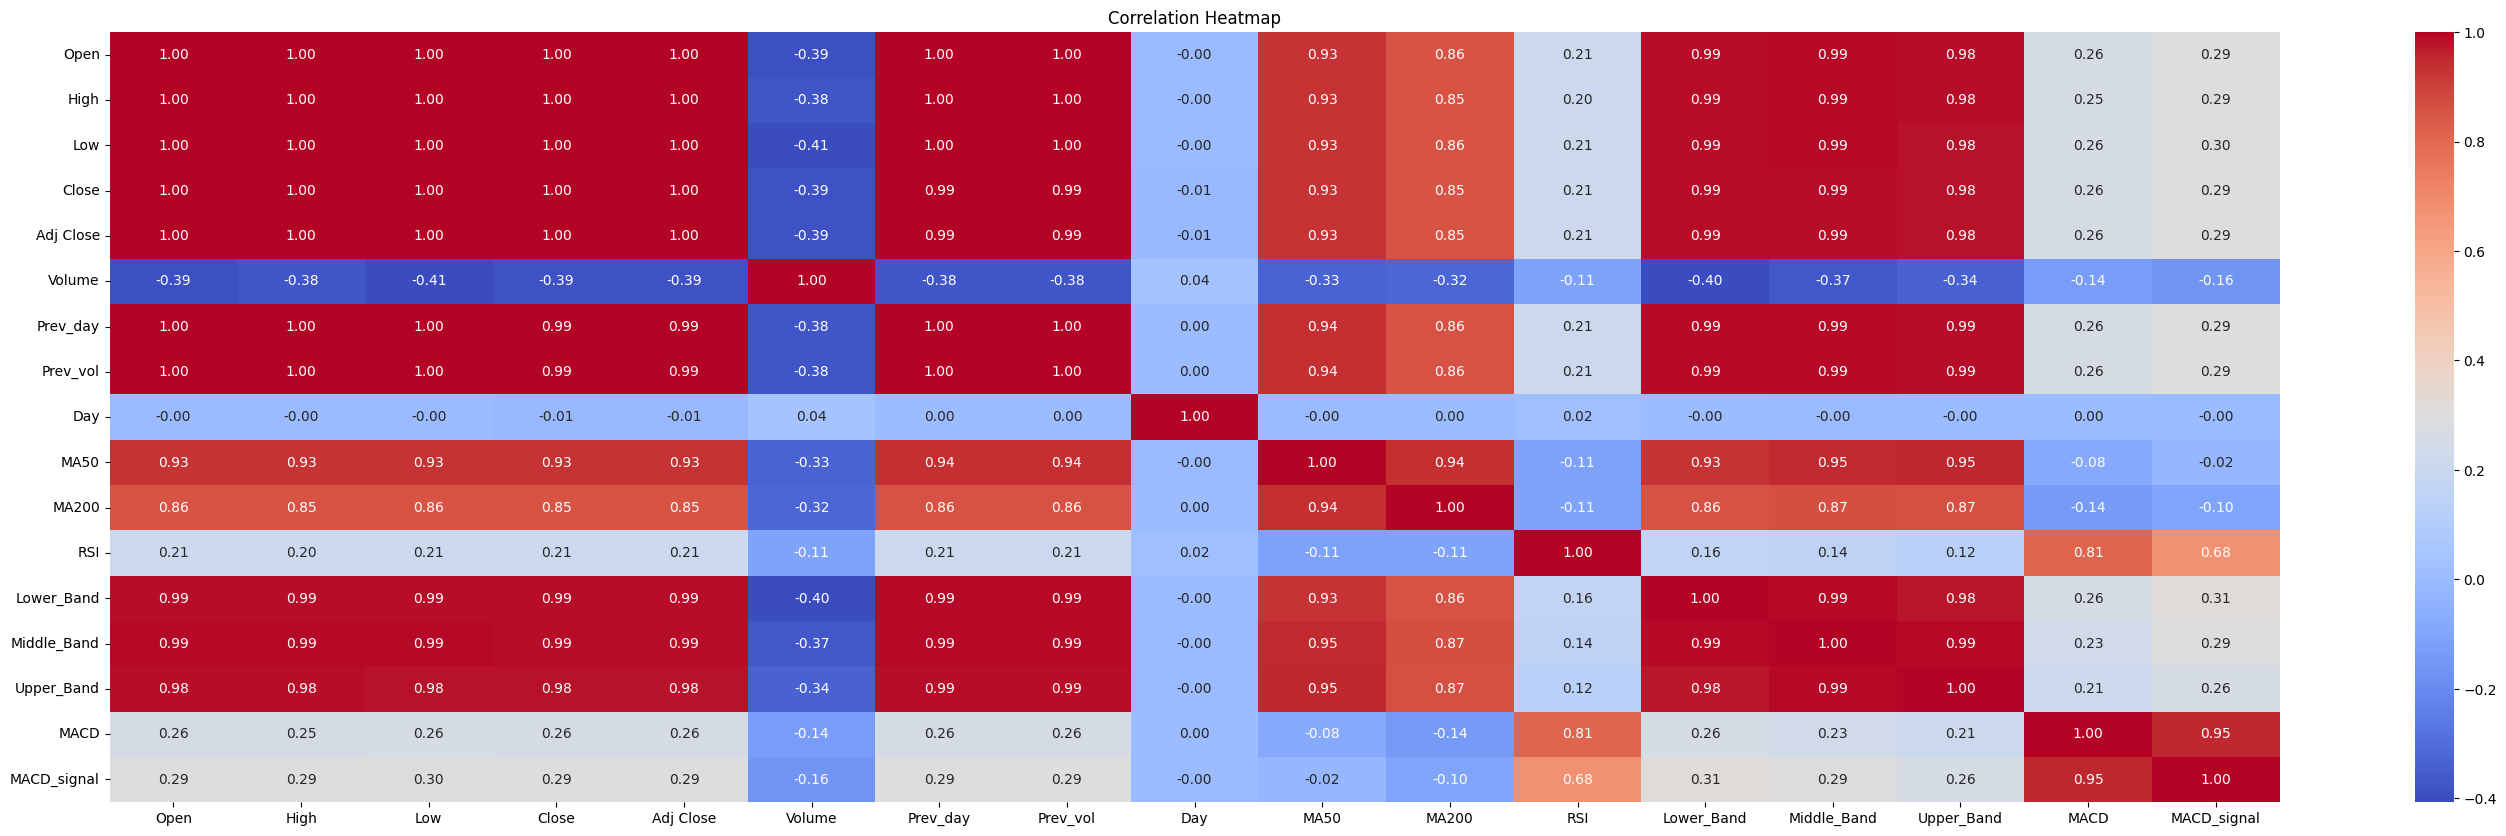

In [ ]:
plt.figure(figsize=(35, 10))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_matrix = stock_data.corr().abs()
mask = (corr_matrix > 0.8) & (corr_matrix < 1.0)
columns_to_drop = set()
for col in mask.columns:
    correlated_cols = mask.index[mask[col]].tolist()
    if correlated_cols:
        columns_to_drop.add(min(correlated_cols, key=len))
stock_data =stock_data.drop(columns=columns_to_drop)


<ipython-input-30-a141940a9edf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = stock_data.corr().abs()


In [ ]:
stock_data.head()

,High,Close,Adj Close,Volume,Prev_day,Prev_vol,Day,MA50,MA200,date,Lower_Band,Middle_Band,Upper_Band,MACD_signal
Date,,,,,,,,,,,,,,
2018-11-19,285.089996,270.600006,270.600006,12993800,286.209991,286.209991,0,337.1728,336.16715,2018-11-19,283.333924,290.294000,297.254076,-11.784998
2018-11-20,276.339996,266.980011,266.980011,16693800,270.600006,270.600006,1,335.6166,336.24885,2018-11-20,269.500800,285.600000,301.699200,-12.252439
2018-11-21,275.339996,262.130005,262.130005,11023000,266.980011,266.980011,2,333.8376,336.25515,2018-11-21,261.293181,280.116003,298.938826,-12.874068
2018-11-23,265.500000,258.820007,258.820007,5245100,262.130005,262.130005,4,331.6812,336.24300,2018-11-23,253.258048,275.196002,297.133956,-13.607789
2018-11-26,266.250000,261.429993,261.429993,12498600,258.820007,258.820007,0,329.4946,336.28660,2018-11-26,249.897760,268.948004,287.998248,-14.395097


Data preparation Completed.

Creating training and testing dataset.

y = stock_data['Adj Close']
x = stock_data.drop(['Close', 'Volume','Adj Close','date'], axis=1).values

num_test = 365
x_training = x[:-1*num_test]
y_training = y[:-1*num_test]
x_testing = x[-1*num_test:]
y_testing = y[-1*num_test:]
print(x_training.shape,
y_training.shape,
x_testing.shape,
y_testing.shape)

Shape of X and Y train test Data (566, 10) (566,) (243, 10) (243,)


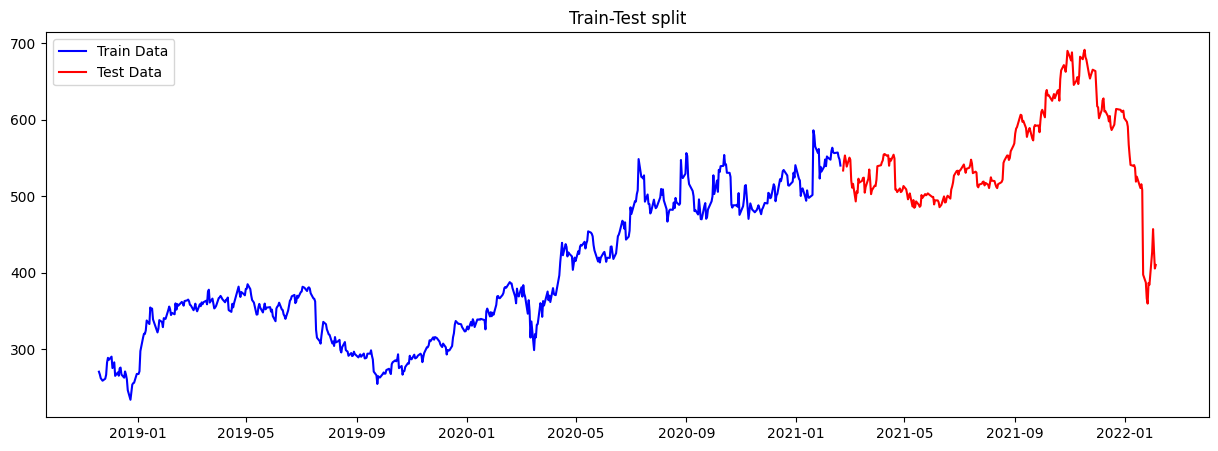

In [ ]:
#70:30 Train:Test split

from sklearn.model_selection import train_test_split
y = stock_data['Adj Close']
x = stock_data.drop(['Close', 'Volume','Adj Close','date'], axis=1).values
x_training,x_testing,y_training,y_testing= train_test_split(x,y,test_size=0.3,shuffle = False)
print("Shape of X and Y train test Data",x_training.shape,
y_training.shape,
x_testing.shape,
y_testing.shape)
plt.figure(figsize=(15,5))
plt.title("Train-Test split")
plt.plot(y_training.index,y_training,label="Train Data",color = "Blue")
plt.plot(y_testing.index,y_testing,label="Test Data",color = "Red")
plt.legend()
plt.show()

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
untrain=x_training
untest=x_testing
x_training= scaler.fit_transform(x_training)
x_testing= scaler.transform(x_testing)

TRAINING OUR MODELS

MODEL01: LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

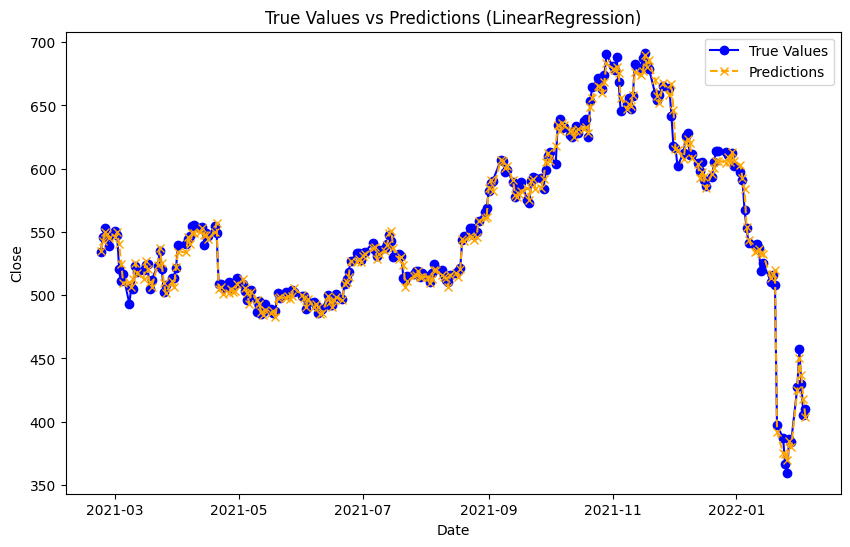

In [ ]:
model = LinearRegression()
model = model.fit(x_training, y_training)
preds = model.predict(x_testing)
x_values = y_testing.index
plt.figure(figsize=(10,6))
plt.plot(x_values, y_testing, label='True Values', marker='o', linestyle='-', color='blue')
plt.plot(x_values, preds, label='Predictions', marker='x', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('True Values vs Predictions (LinearRegression)')
plt.legend()
plt.show()


In [ ]:
mae = mean_absolute_error(y_testing, preds)
print(f'01.Mean Absolute Error using LR: {mae}')
percentage_error = np.abs((preds - y_testing) / y_testing) * 100
average_percentage_error_lr= np.mean(percentage_error)
print(f'02.Average Percentage Error using Linear Regression: {average_percentage_error_lr:.2f}%')
linearRegression_error=average_percentage_error_lr
r_squared_lr = r2_score(y_testing, preds)
print(f'03.R-squared (LR): {r_squared_lr}')


01.Mean Absolute Error using LR: 4.559345427199087
02.Average Percentage Error using Linear Regression: 0.83%
03.R-squared (LR): 0.9915506379868779


In [ ]:
LinearRegression_model_acc = model.score(x_training, y_training)
LinearRegression_testing_acc = model.score(x_testing, y_testing)

print("The Training accuracy of the model is {:.2f}".format(LinearRegression_model_acc))
print("The Testing accuracy of the model is {:.2f}".format(LinearRegression_testing_acc))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.99


MODEL02: SUPPORT VECTOR MACHINES

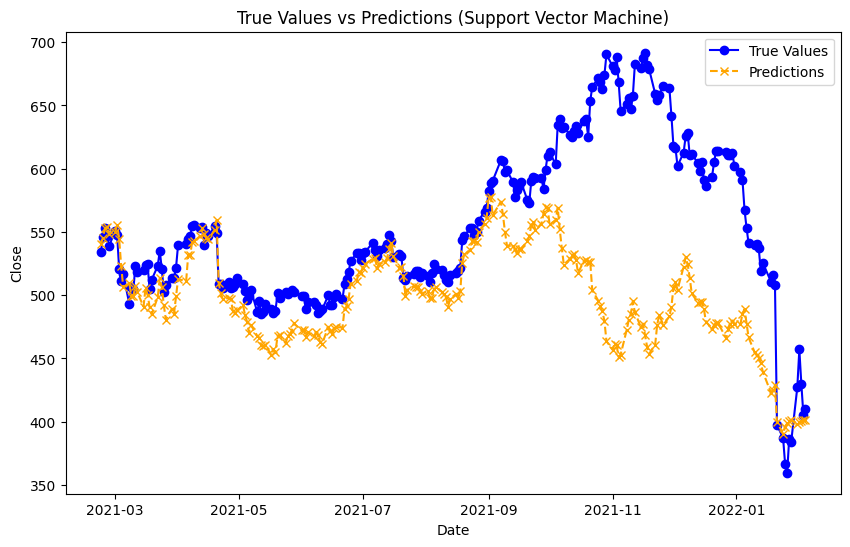

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
#svm_model = SVR(kernel='poly')
svm_model = SVR(kernel='rbf',C=1e3)
svm_model.fit(x_training, y_training)
svm_preds = svm_model.predict(x_testing)
plt.figure(figsize=(10, 6))

plt.plot(x_values, y_testing, label='True Values', marker='o', linestyle='-', color='blue')
plt.plot(x_values, svm_preds, label='Predictions', marker='x', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('True Values vs Predictions (Support Vector Machine)')
plt.legend()
plt.show()


In [ ]:
mae_svm = mean_absolute_error(y_testing, svm_preds)
print(f'Mean Absolute Error (SVM): {mae_svm}')
percentage_error = np.abs((svm_preds - y_testing) / y_testing) * 100
average_percentage_error_svm= np.mean(percentage_error)
print(f'Average Percentage Error using SVM: {average_percentage_error_svm:.2f}%')
svm_error=average_percentage_error_svm
r_squared_svm = r2_score(y_testing, svm_preds)
print(f'R-squared (SVM): {r_squared_svm}')

Mean Absolute Error (SVM): 279.4476435881598
Average Percentage Error using SVM: 45.92%
R-squared (SVM): -43.62336366098828


In [ ]:
svm_model_acc = svm_model.score(x_training, y_training)
svm_testing_acc = svm_model.score(x_testing, y_testing)

print("The Training accuracy of the model is {:.2f}".format(svm_model_acc))
print("The Testing accuracy of the model is {:.2f}".format(svm_testing_acc))

The Training accuracy of the model is 0.86
The Testing accuracy of the model is -43.62


MODEL03: Random Forest Regression(Decision Tree)

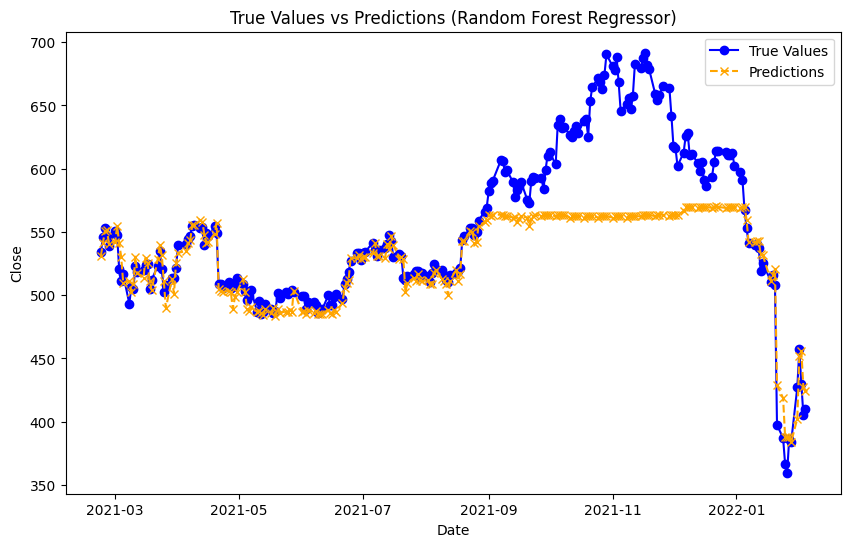

In [ ]:
RFR_model = RandomForestRegressor(n_estimators=50,random_state=0, max_depth=15,max_features=25)
RFR_model.fit(x_training,y_training)
RFR_preds = RFR_model.predict(x_testing)
plt.figure(figsize=(10, 6))

plt.plot(x_values, y_testing, label='True Values', marker='o', linestyle='-', color='blue')
plt.plot(x_values, RFR_preds, label='Predictions', marker='x', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('True Values vs Predictions (Random Forest Regressor)')
plt.legend()
plt.show()

In [ ]:
mae_RFR = mean_absolute_error(y_testing, RFR_preds)
print(f'01.Mean Absolute Error using Random Forest: {mae_RFR}')
percentage_error = np.abs((RFR_preds - y_testing) / y_testing) * 100
average_percentage_error_rfr = np.mean(percentage_error)
print(f'02.Average Percentage Error using Random Forest Regressor: {average_percentage_error_rfr:.2f}%')
RFR_error=average_percentage_error_rfr
r_squared_rfr = r2_score(y_testing, RFR_preds)
print(f'03.R-squared (RFR): {r_squared_rfr}')

01.Mean Absolute Error using Random Forest: 26.689842161152413
02.Average Percentage Error using Random Forest Regressor: 4.37%
03.R-squared (RFR): 0.5676923600270771


In [ ]:
RFR_model_acc= RFR_model.score(x_training, y_training)
RFR_testing_acc = RFR_model.score(x_testing, y_testing)
print("The Training accuracy of the model is {:.2f}".format(RFR_model_acc))

print("The Testing accuracy of the model is {:.2f}".format(RFR_testing_acc))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.57


SUMMARIZING THE RESULTS

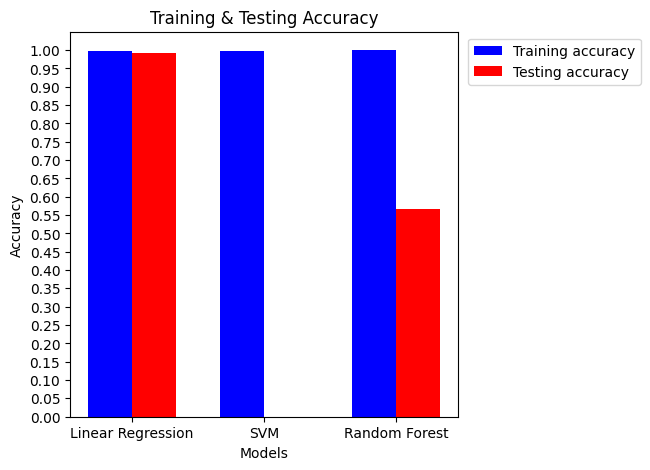

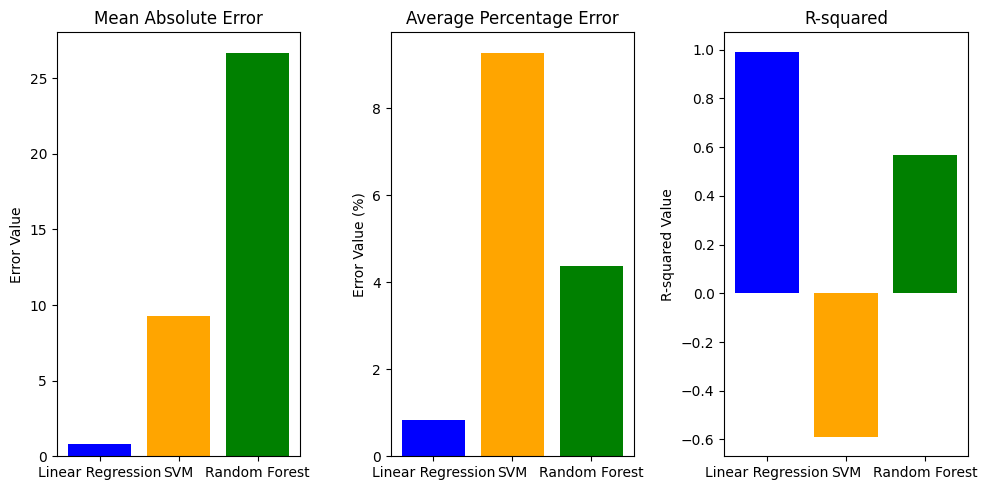

In [ ]:
plt.figure(figsize=(5,5))
xpos = 0
barwidth = 0.2
plt.bar(xpos,LinearRegression_model_acc,color='blue',width=barwidth,label="Training accuracy")
plt.bar(xpos+0.2,LinearRegression_testing_acc,color='red',width=barwidth,label="Testing accuracy")
plt.bar(xpos+0.6,svm_model_acc,color='blue',width=barwidth)
plt.bar(xpos+0.8,svm_testing_acc,color='red',width=barwidth)
plt.bar(xpos+1.2,RFR_model_acc,color='blue',width=barwidth)
plt.bar(xpos+1.4,RFR_testing_acc,color='red',width=barwidth)
plt.xticks([0.1,0.7,1.3],['Linear Regression', 'SVM', 'Random Forest'])
plt.yticks(np.arange(-0.5,1.05,step = 0.05))
plt.title("Training & Testing Accuracy")
plt.legend(bbox_to_anchor=(1.25,1),loc='upper center')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim((0,1.05))
plt.show()



models = ['Linear Regression', 'SVM', 'Random Forest']
mae_values = [linearRegression_error, svm_error, mae_RFR]
percentage_error_values = [average_percentage_error_lr, average_percentage_error_svm, average_percentage_error_rfr]
r_squared_values = [r_squared_lr, r_squared_svm, r_squared_rfr]

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color=['blue', 'orange', 'green'])
plt.title('Mean Absolute Error')
plt.ylabel('Error Value')

plt.subplot(1, 3, 2)
plt.bar(models, percentage_error_values, color=['blue', 'orange', 'green'])
plt.title('Average Percentage Error')
plt.ylabel('Error Value (%)')
plt.subplot(1, 3, 3)
plt.bar(models, r_squared_values, color=['blue', 'orange', 'green'])
plt.title('R-squared')
plt.ylabel('R-squared Value')

plt.tight_layout()
plt.show()


FINAL VERDICT: LINEAR REGRESSION IS THE BEST MODEL FOR OUR DATA SET AS IT HAS THE LOWEST ERROR

